In [81]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load dataset csv
jamur = pd.read_csv('D:/new/dataset/mushrooms.csv')

# Inspeksi data
display(jamur.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [82]:
labelencoder=LabelEncoder()
for column in jamur.columns:
    jamur[column] = labelencoder.fit_transform(jamur[column])

In [83]:
display(jamur.describe())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [84]:
print(jamur.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [85]:
X = jamur[['cap-shape', 'habitat']]
y = jamur['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

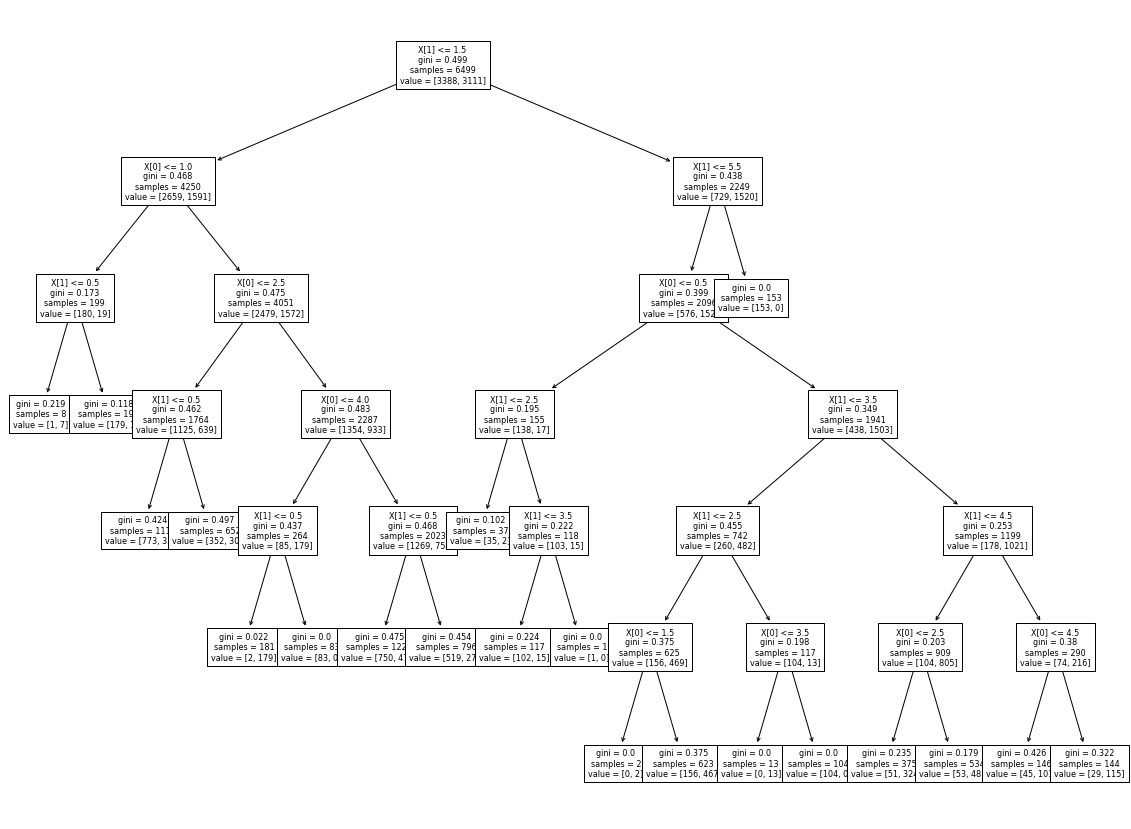

In [86]:
plt.figure(figsize=(20,15))
tree.plot_tree(dt.fit(X_train, y_train), fontsize=8)
plt.show()

In [87]:
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 1]


In [88]:
def inverse_label(b):
    return 'e' if b == 1 else 'p'

res_label = np.vectorize(inverse_label)
pred_label = res_label(y_pred[0:5])
print(pred_label)

['p' 'p' 'p' 'e' 'e']


In [89]:
y_pred = dt.predict(X_test)

#  menghitung set accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {acc}")

Test Set Accuracy: 0.7064615384615385


In [90]:
# Slice dataframe dari kolom radius_mean hingga fractal...
X_full = jamur.iloc[:,1:]
y_full = jamur['class']
# Cek fitur dan instance
X_full.shape

(8124, 22)

In [91]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2, random_state=21)
# Instantiate dt_entropy, set entropy
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy ke training set
dt_entropy.fit(X_full_train, y_full_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [92]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_full_train, y_full_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [93]:
y_full_pred_entropy = dt_entropy.predict(X_full_test)
y_full_pred_gini = dt_gini.predict(X_full_test)

accuracy_entropy = accuracy_score(y_full_test, y_full_pred_entropy)
accuracy_gini = accuracy_score(y_full_test, y_full_pred_gini)

# Display accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Display accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  1.0
Accuracy achieved by using gini:  1.0


In [94]:
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

In [95]:
np.sum(y) / len(y)

0.48202855736090594

In [96]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [97]:
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(f"Logistic Regression : {log_model.score(X_test, y_test)}")
print(f"Support Vector Machine : {svm_model.score(X_test, y_test)}")
print(f"Neural Network : {nn_model.score(X_test, y_test)}")
print("Metrics Acc : {:.2f}".format(acc))

Logistic Regression : 0.616
Support Vector Machine : 0.6812307692307692
Neural Network : 0.7138461538461538
Metrics Acc : 0.71


<AxesSubplot:>

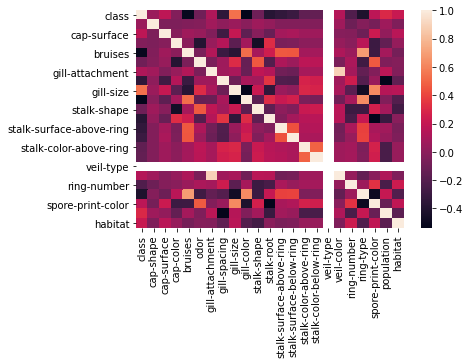

In [98]:
X_test.shape

corr = jamur.corr()

sns.heatmap(corr)